In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv(r"E:\insurance.csv")

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
df.shape

(1338, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [22]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])

# EDA and Visualization

<Axes: >

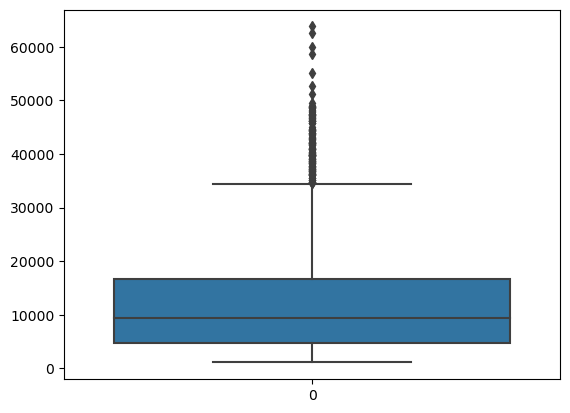

In [23]:
sns.boxplot(df['charges'])

Text(0.5, 1.0, 'The number of smokers and non-smokers by age')

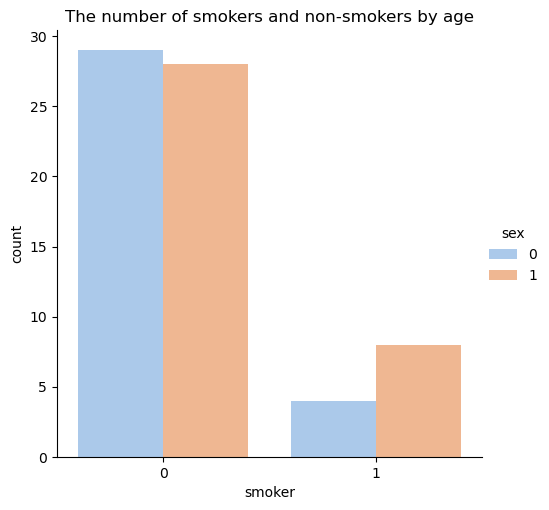

In [24]:
sns.catplot(x="smoker",kind="count",hue="sex",palette="pastel",data=df[(df.age==18)])
plt.title("The number of smokers and non-smokers by age")

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

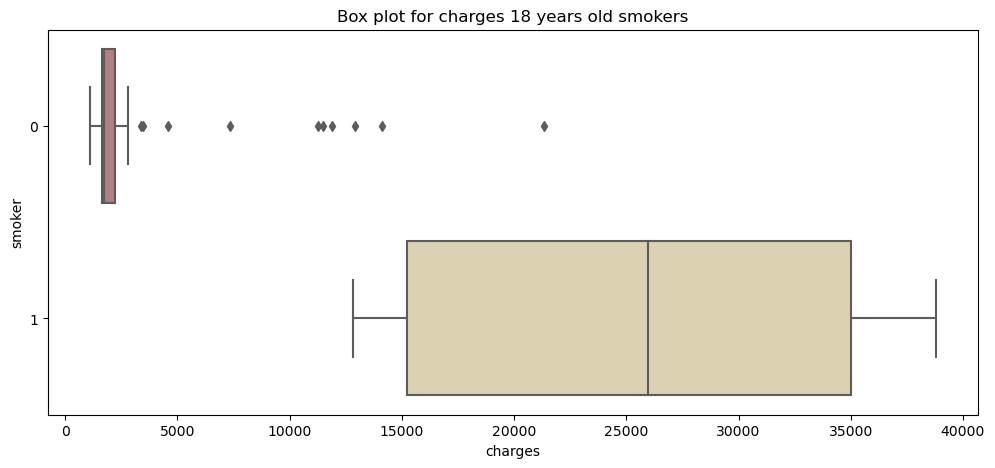

In [25]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

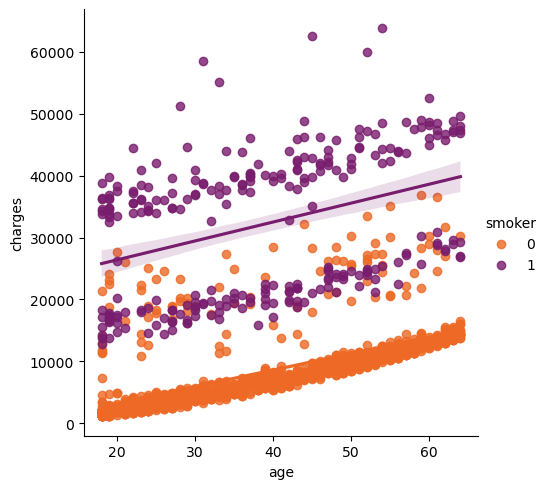

In [26]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')

<Axes: xlabel='charges', ylabel='Count'>

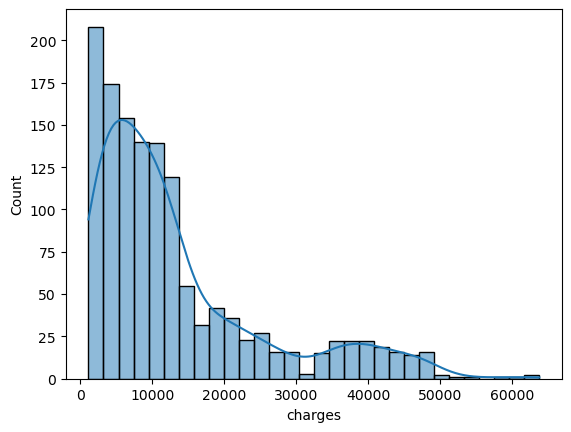

In [27]:
sns.histplot(data=df,x='charges',kde=True)

Text(0.5, 1.0, 'Distribution of Charges')

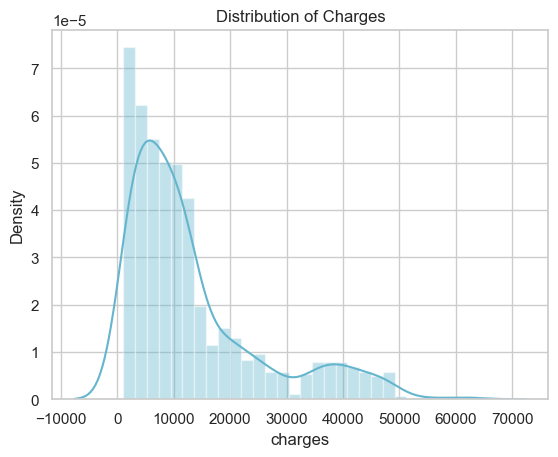

In [28]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

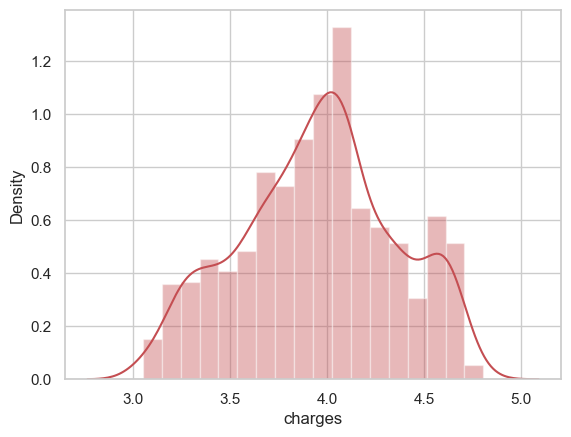

In [29]:
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

In [30]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

<Axes: xlabel='region', ylabel='charges'>

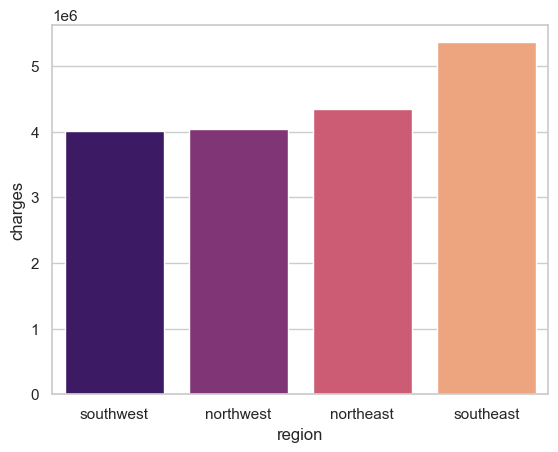

In [31]:
sns.barplot(x=charges.index, y=charges, palette='magma')

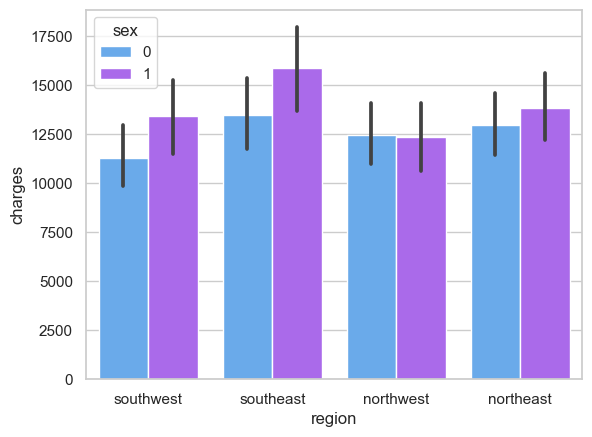

In [32]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

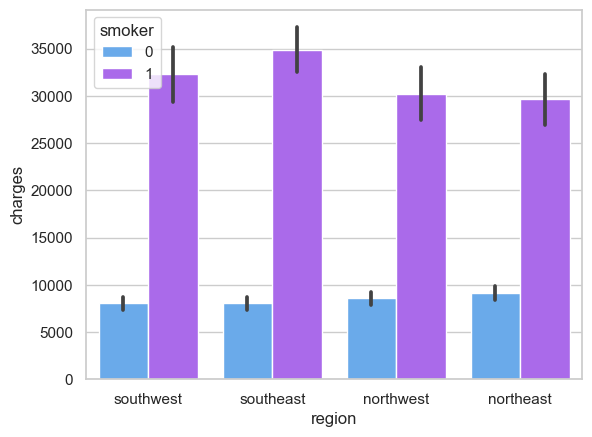

In [33]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='cool')

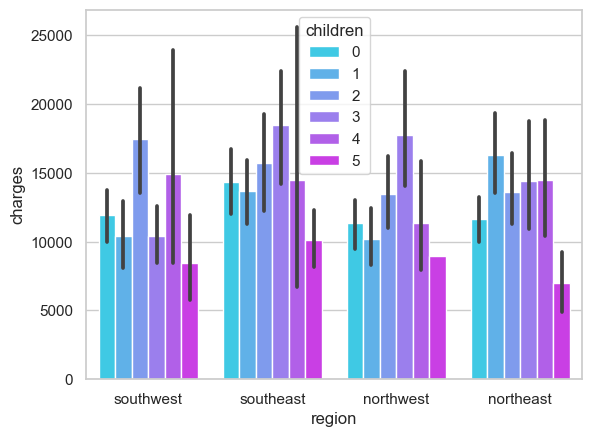

In [34]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='cool')

In [35]:
df['region']= label_encoder.fit_transform(df['region']) 

In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

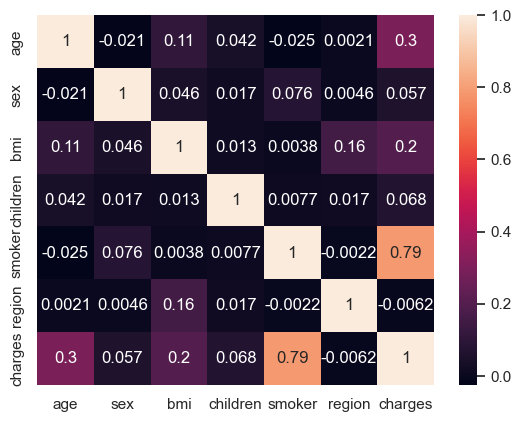

In [37]:
sns.heatmap(df.corr(),annot=True)

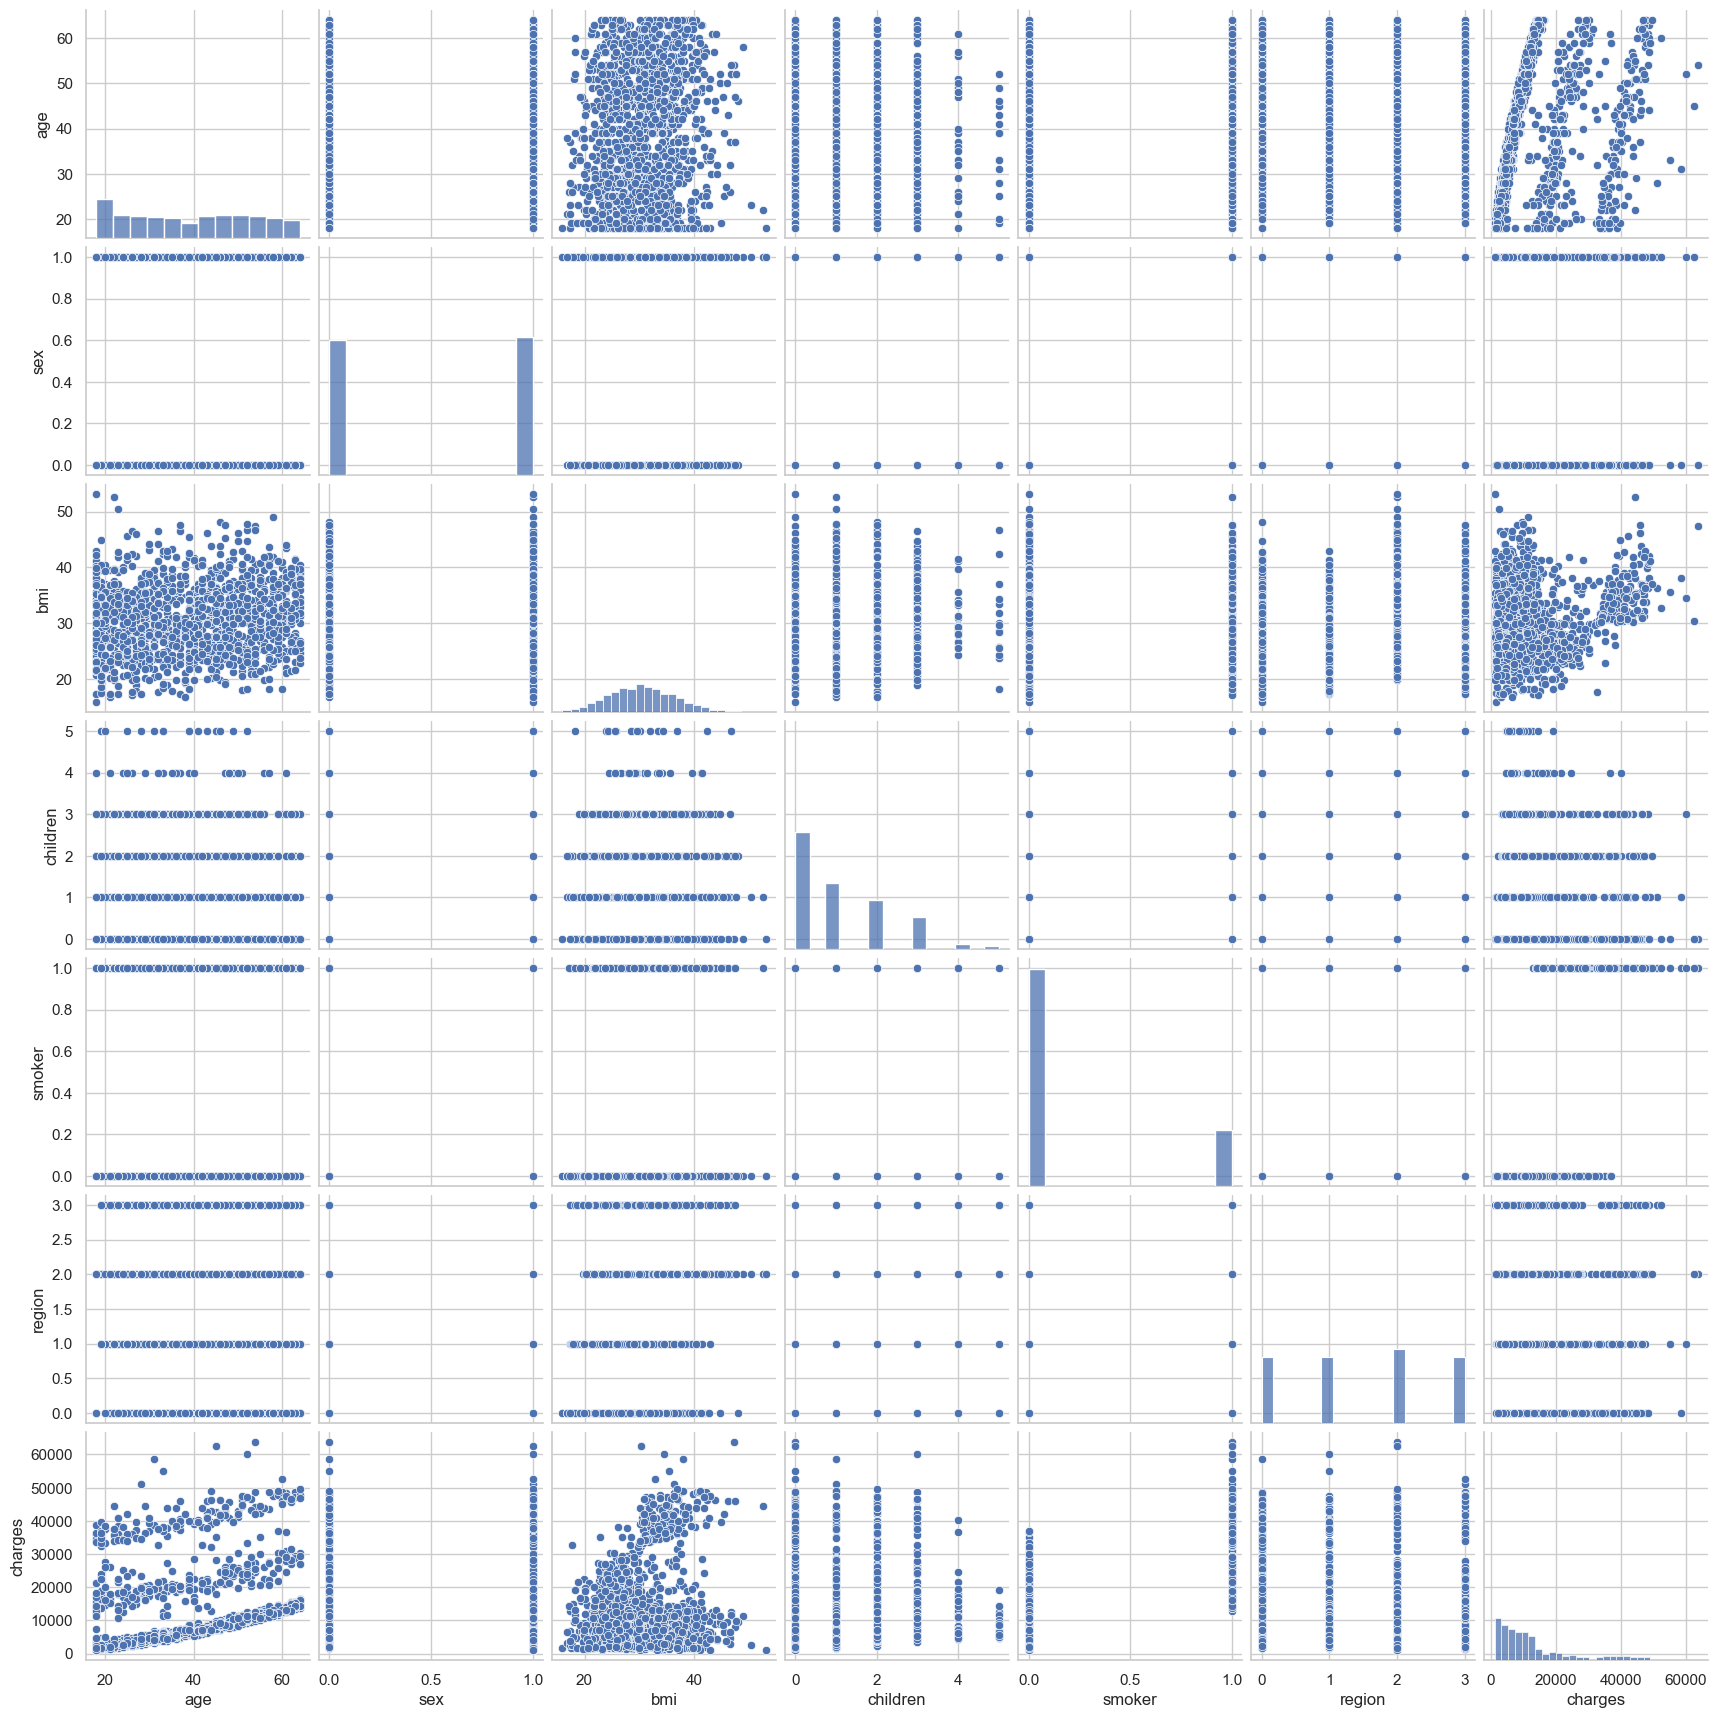

In [38]:
sns.pairplot(df)

<Axes: xlabel='smoker', ylabel='charges'>

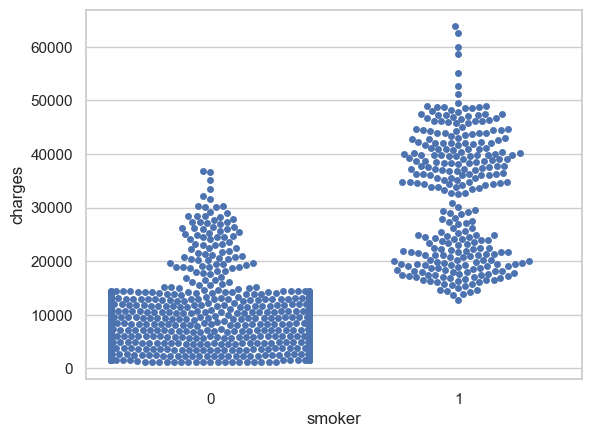

In [39]:
sns.swarmplot(x="smoker", y="charges", data=df)

<Axes: xlabel='smoker', ylabel='charges'>

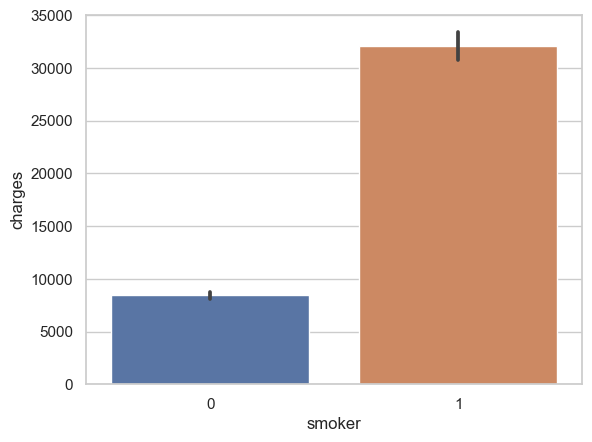

In [40]:
sns.barplot(x="smoker", y="charges", data=df)

<Axes: xlabel='sex', ylabel='charges'>

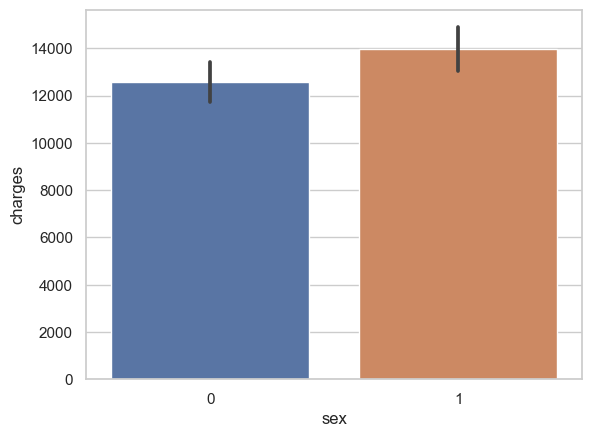

In [41]:
sns.barplot(x="sex", y="charges", data=df)

([<matplotlib.patches.Wedge at 0x1a2ee7f3e10>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'Male'),
  Text(0.018078568997005343, -1.0998514287589123, 'Female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.5%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.5%')])

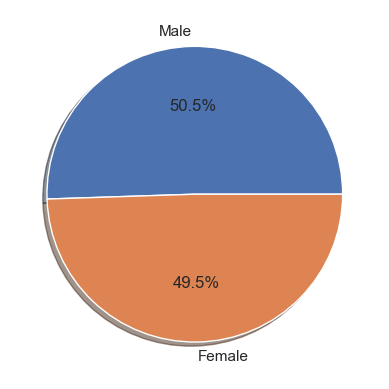

In [42]:
plt.pie(df['sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True)


# Compare Between Models

In [43]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),

}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Training Model LR 
-----------------------------------------------
Score is 0.7833463107364538
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364538
Mean Squared Error: 33635210.43117842
Mean Absolute Error: 4186.508898366437
Training Model RF 
-----------------------------------------------
Score is 0.8757913994372141
Training R-squared: 0.9273222942979313
Testing R-squared: 0.8757913994372141
Mean Squared Error: 19283227.677740898
Mean Absolute Error: 2433.29834073878
Training Model DT 
-----------------------------------------------
Score is 0.6892534560920461
Training R-squared: 0.9983078124756305
Testing R-squared: 0.6892534560920461
Mean Squared Error: 48243006.75716253
Mean Absolute Error: 3153.983651899254
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.83791201454319
Training R-squared: 0.9927812965590004
Testing R-squared: 0.83791201454319
Mean Squared Error: 25163954.13222678
Mean Absolute Error: 2617.4701684

In [62]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [63]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13740918.931, MSE test data: 19845744.977
R2 train data: 0.905, R2 test data: 0.872


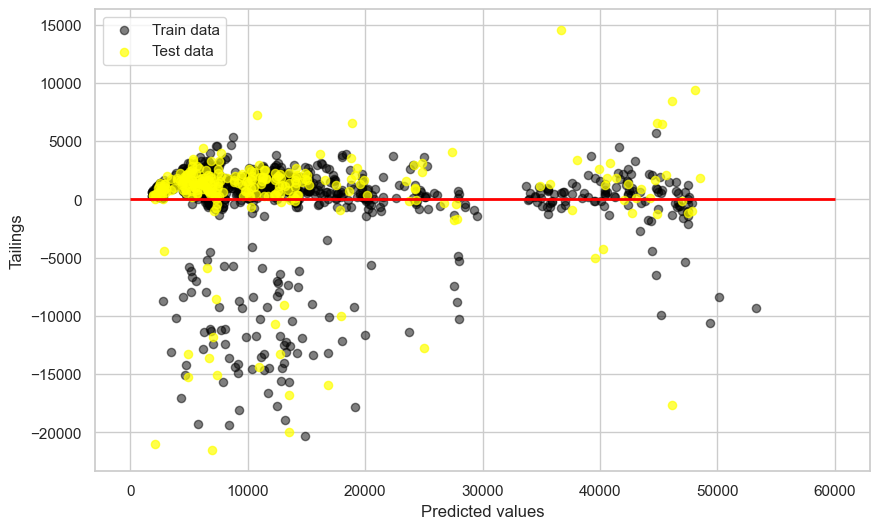

In [64]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'yellow', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# LinearRegression

In [50]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364538
